## Example data: sign-constrained Perceptron at N = 1000

The experiment data:
P =  800 , success rate =  1.0
P =  850 , success rate =  1.0
P =  900 , success rate =  1.0
P =  950 , success rate =  0.8666666666666667
P =  1000 , success rate =  0.6666666666666666
P =  1050 , success rate =  0.06666666666666667
P =  1100 , success rate =  0.0


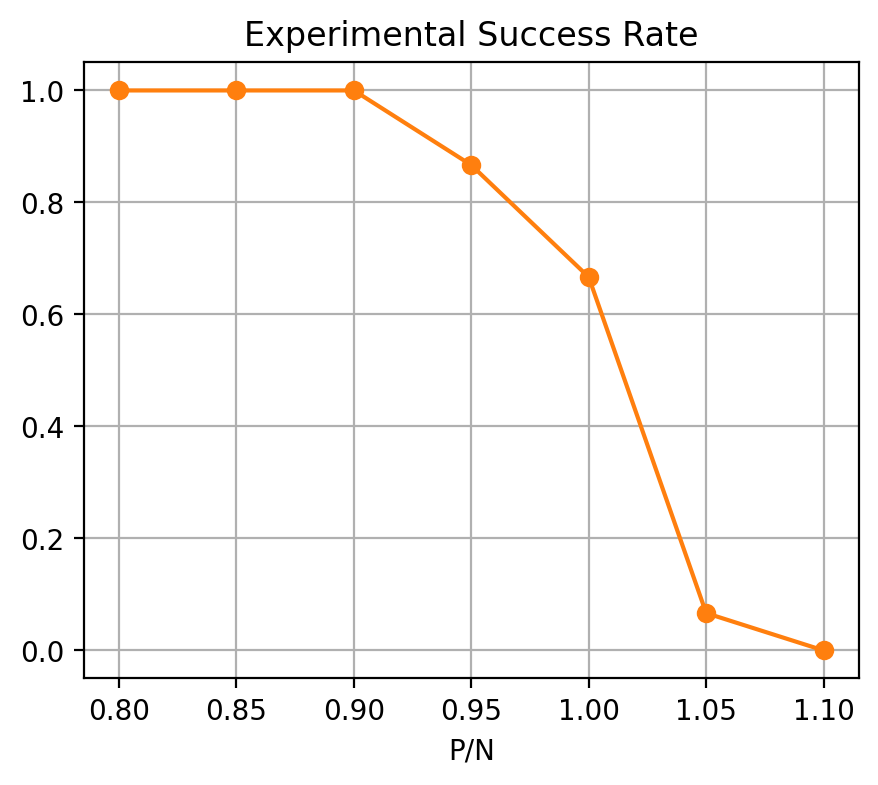

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment data,  P : results of classification
experi = {
    800: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    850: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    900: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    950: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    1000: [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    1050: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    1100: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
}
N = 1000
x = [x_ / N for x_ in list(experi.keys())]
y = [np.mean(experi[P]) for P in experi]
print("The experiment data:")
for P in experi:
    print("P = ", P, ", success rate = ", np.mean(experi[P]))

plt.figure(figsize=(5, 4), dpi=200)
plt.plot(x, y, "o-", color="tab:orange")
plt.xlabel("P/N")
plt.title("Experimental Success Rate")
plt.grid(True)


## Using sub-sampling and fitting logistic regression

We subsample 50% of the experimental data, and fit a logistic regression classifier. This process is repeated 50 times. Default regularization is L2.

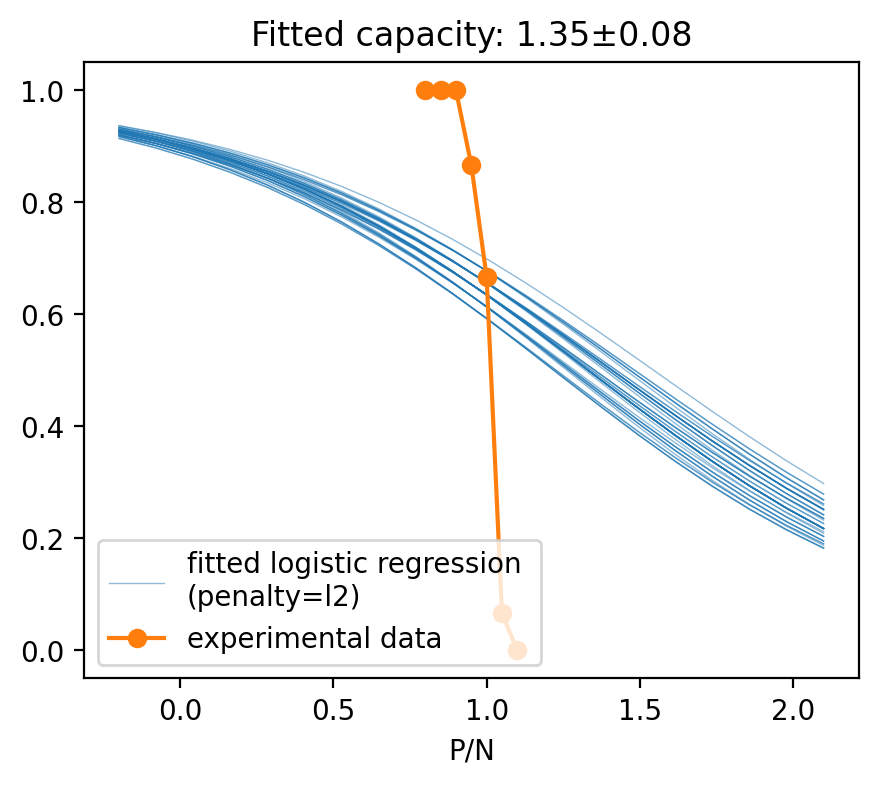

In [105]:
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
import matplotlib.pyplot as plt

sample = 50
sample_ratio = 0.5
psedoC = []
capacity = []
plt.figure(figsize=(5, 4), dpi=200)
for i in range(sample):
    psedoX = []
    psedoY = []

    for P in experi:
        psedoX += [P / N] * int(len(experi[P]) * sample_ratio)
        psedoY += random.sample(experi[P], k=int(len(experi[P]) * sample_ratio))

    if min(psedoY) == max(psedoY):
        continue
    clf = LogisticRegression().fit(np.array(psedoX).reshape(-1, 1), np.array(psedoY))
    newX = np.linspace(min(experi.keys()) / N - 1, max(experi.keys()) / N + 1, 20)

    if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
        continue
    psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

    probs = clf.predict_proba(newX.reshape(-1, 1))

    plt.plot(
        newX,
        probs[:, 1],
        alpha=0.5,
        linewidth=0.5,
        color="tab:blue",
        label="fitted logistic regression \n(penalty=l2)" if i == 0 else None,
    )
plt.plot(x, y, "o-", color="tab:orange", label="experimental data")
plt.legend()
plt.xlabel("P/N")
capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])
plt.title("Fitted capacity: {:0.2f}±{:0.2f}".format(capacity[-1][1], capacity[-1][2]))

plt.show()

## Using sub-sampling and fitting logistic regression

We subsample 50% of the experimental data, and fit a logistic regression classifier. This process is repeated 50 times. We don't use regularization.

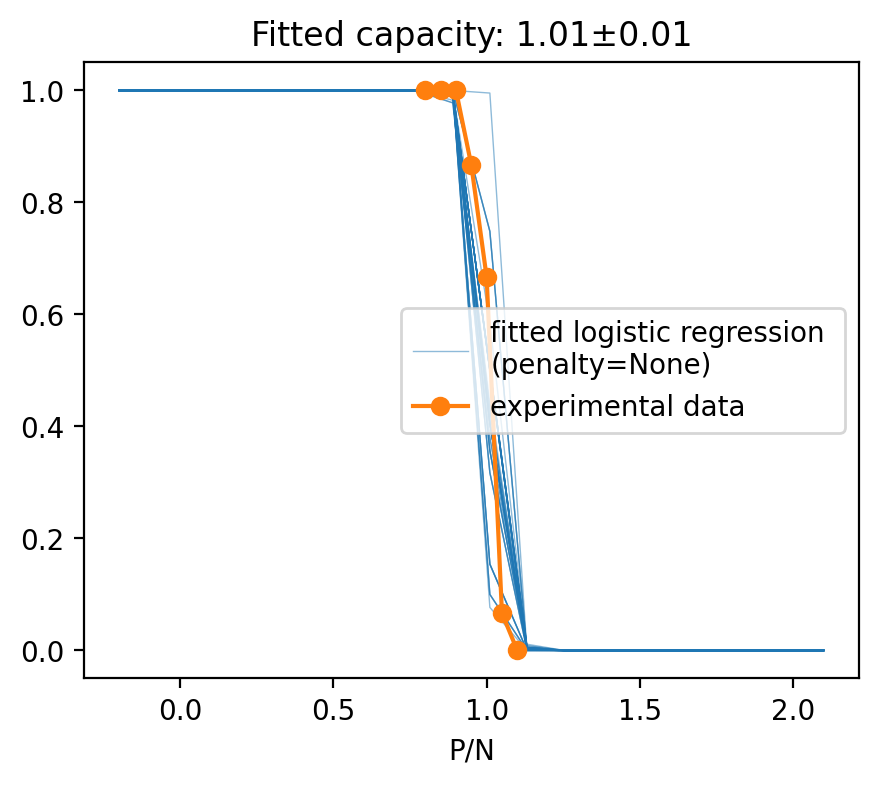

In [106]:
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
import matplotlib.pyplot as plt

sample = 50
sample_ratio = 0.5
psedoC = []
capacity = []
plt.figure(figsize=(5, 4), dpi=200)
for i in range(sample):
    psedoX = []
    psedoY = []

    for P in experi:
        psedoX += [P / N] * int(len(experi[P]) * sample_ratio)
        psedoY += random.sample(experi[P], k=int(len(experi[P]) * sample_ratio))

    if min(psedoY) == max(psedoY):
        continue
    clf = LogisticRegression(penalty=None).fit(
        np.array(psedoX).reshape(-1, 1), np.array(psedoY)
    )
    newX = np.linspace(min(experi.keys()) / N - 1, max(experi.keys()) / N + 1, 20)

    if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
        continue
    psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

    probs = clf.predict_proba(newX.reshape(-1, 1))

    plt.plot(
        newX,
        probs[:, 1],
        alpha=0.5,
        linewidth=0.5,
        color="tab:blue",
        label="fitted logistic regression \n(penalty=None)" if i == 0 else None,
    )
plt.plot(x, y, "o-", color="tab:orange", label="experimental data")
plt.legend()
plt.xlabel("P/N")
capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])
plt.title("Fitted capacity: {:0.2f}±{:0.2f}".format(capacity[-1][1], capacity[-1][2]))

plt.show()